# Explore here


* **Importar librerías y dataframe**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv')

* **Tamaño del dataframe e información básica**

In [26]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  category      
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

* El dataframe tiene 48895 filas y 16 columnas.
* Hay variables con null values (name, host_name, last_review y reviews_per_month).
* Hay variables de type 'object', que probablemente sean categóricas.

In [5]:
df['id'].nunique()
#Chequeo que los id sean todos distintos

48895

In [6]:
round(df.describe(), 2)
#Estadísticas descriptivas de las variables numéricas

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [7]:
df.describe(include = classmethod) 
#Estadísticas descriptivas de las variables categóricas

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


Cosas que llaman la atención: 
* Hay precios con valor 0
* El precio máximo es 10000, bastante más alto que la media y la mediana
* El máximo de noches mínimas es 1250

In [6]:
for col in ['neighbourhood', 'neighbourhood_group', 'room_type', 'host_id']:
    df[col] = df[col].astype('category')

df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
#Transformamos datatypes

In [8]:
df.info() 
#Para chequear que la transformación quedó bien

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  category      
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

* **Valores duplicados y nulos**

In [38]:
df_duplicates = df['id'].duplicated().sum()
print(f'Parece haber {df_duplicates} valores duplicados en el dataset considerando la variable id.')

Parece haber 0 valores duplicados en el dataset considerando la variable id.


In [53]:
len(df[df['price'] == 0]) 

11

In [40]:
df[df['price']==0].value_counts('neighbourhood_group')

neighbourhood_group
Brooklyn     9
Bronx        1
Manhattan    1
dtype: int64

Hay 11 observaciones con precio igual a 0, que pertenecen a los barrios Brooklyn, Bronx y Manhattan. </br> Vamos a imputarles el precio medio para cada barrio.

In [41]:
df.groupby('neighbourhood_group')['price'].agg(['mean'])

,mean
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [54]:
df['price'] = df['price'].replace(0, np.NaN)
#Reemplazamos los 0 por np.NaN para poder usar fillna

In [57]:
df['price'] = df['price'].fillna(df.groupby('neighbourhood_group')['price'].transform('mean'))
#Imputamos el precio medio para cada barrio agrupado

In [58]:
df['price'].describe()
#Ahora el precio mínimo es 10

count    48895.000000
mean       152.749410
std        240.143813
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [61]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Reviews per month, last review, name y host name tienen valores nulos.

In [62]:
df[df['reviews_per_month'].isnull()]['number_of_reviews'].count()
#Los listings que tienen 0 reviews son los mismos que tienen null values en reviews_per_month

10052

In [63]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
#Pasamos a 0 los null values de reviews_per_month

In [64]:
df[df['last_review'].isnull()]['number_of_reviews'].count()
#Los listings que tienen 0 reviews son los mismos que tienen null values en last_review

10052

In [65]:
df['last_review'] = df['last_review'].fillna(0)
#Pasamos a 0 los null values de last_review

In [66]:
df['name'].fillna('unknown', inplace = True)
df['host_name'].fillna('unknown', inplace = True)
#Reemplazamos con unknown los nombres que tienen missing values

In [67]:
df.isnull().sum()
#Ahora no hay valores nulos en el dataframe

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

* **Outliers**

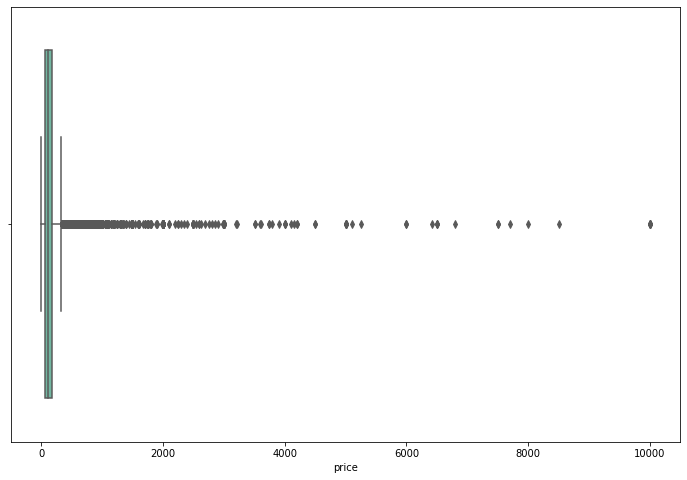

In [46]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = df['price'])
plt.show()

Como se puede ver en el boxplot, la variable precio tiene outliers. </br> Usaremos el approach IQR para manejarlos.

In [98]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
ub = Q3+(1.5*IQR)
lb = Q1-(1.5*IQR)

print(ub) #Upper bound
print(lb) #Lower bound

334.0
-90.0


In [101]:
df = df[(df.price>lb) & (df.price<ub)]
#Eliminamos los outliers

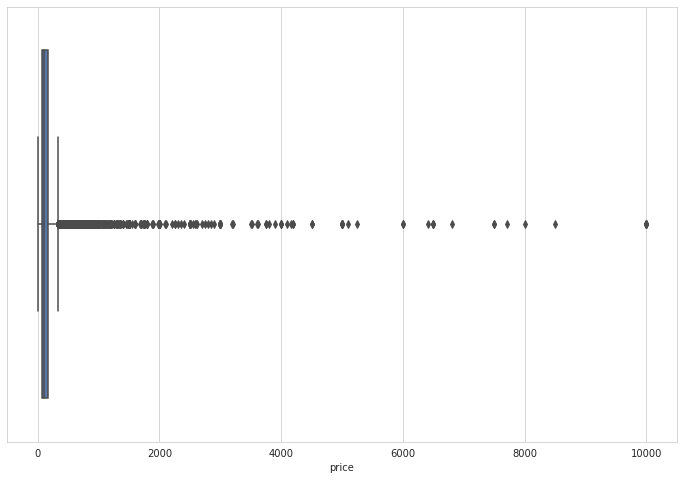

In [77]:
plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")
sns.boxplot(x = df['price'], palette = "deep")
plt.show()
#Boxplot de precios sin los outliers (considerando el IQR approach), vemos que igual hay algunos outliers

In [ ]:
df.hist(bins = 10, figsize = (18,18), grid = False)
plt.show()

* **Correlación y análisis de features relevantes**

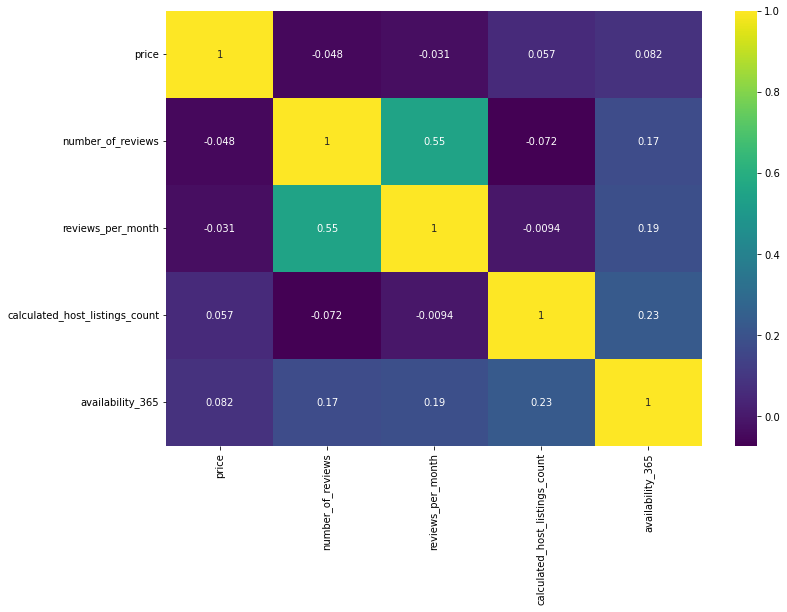

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['price', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(), annot=True, cmap='viridis')
plt.show()

#Reviews per month y number of reviews están correlacionadas porque a más reviews per month más number of reviews en total
#Number of reviews y listings tienen relación negativa porque a menos listings tiene sentido que tengas menos reviews

In [44]:
top10hosts = df['host_id'].value_counts()[:10] 
#Top de los 10 hosts con más publicaciones

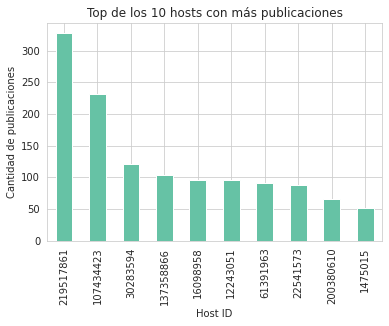

In [91]:
top10hosts.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Cantidad de publicaciones')
plt.title('Top de los 10 hosts con más publicaciones')
plt.show()

In [50]:
topreview = df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending = False)[:10]
#Top de los 10 hosts con más reviews

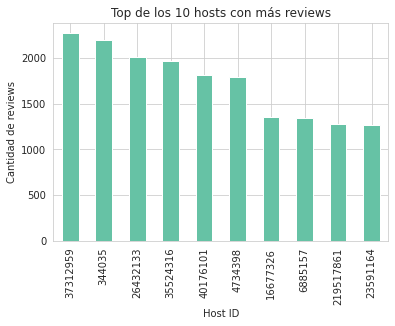

In [90]:
topreview.plot(kind='bar')
plt.xlabel('Host ID')
plt.ylabel('Cantidad de reviews')
plt.title('Top de los 10 hosts con más reviews')
plt.show()

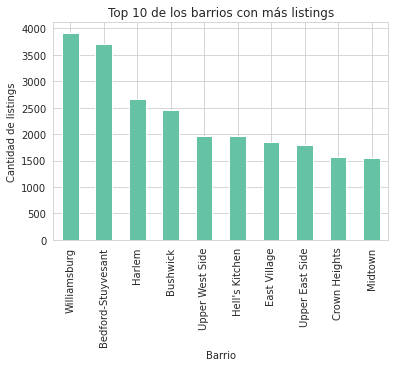

In [89]:
listbarrios = df['neighbourhood'].value_counts()[:10]
listbarrios.plot(kind='bar')
plt.xlabel('Barrio')
plt.ylabel('Cantidad de listings')
plt.title('Top 10 de los barrios con más listings')
plt.show()
#Top 10 de los barrios con más listings

In [30]:
listbarrio = df['neighbourhood_group'].value_counts()
listbarrio
#Cantidad de listings por grupos de barrios

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

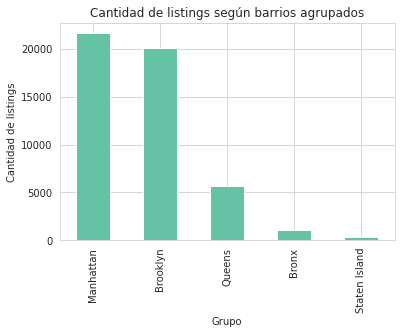

In [88]:
listbarrio.plot(kind='bar')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de listings')
plt.title('Cantidad de listings según barrios agrupados')
plt.show()
#Manhattan y Brooklyn son los grupos con más listings

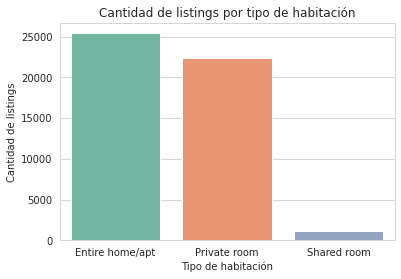

In [82]:
sns.countplot(x = df['room_type'])
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de listings')
plt.title('Cantidad de listings por tipo de habitación')
plt.show()
#Los alquileres de apartamentos enteros son lo más habituales

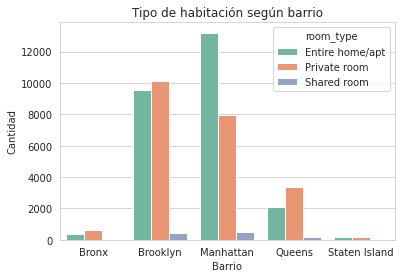

In [83]:
sns.countplot(x = df.neighbourhood_group, hue = df.room_type)
plt.xlabel("Barrio")
plt.ylabel("Cantidad")
plt.title("Tipo de habitación según barrio")
plt.show()

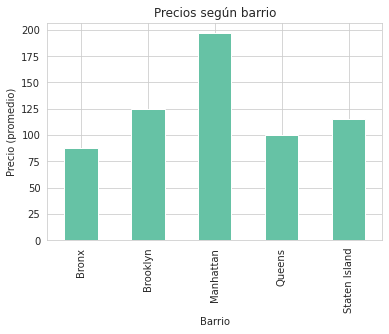

In [86]:
df.groupby(['neighbourhood_group'])['price'].mean().plot(kind = 'bar')
plt.ylabel('Precio (promedio)')
plt.xlabel('Barrio')
plt.title('Precios según barrio')
plt.show()
#Manhattan tiene en promedio los precios más altos

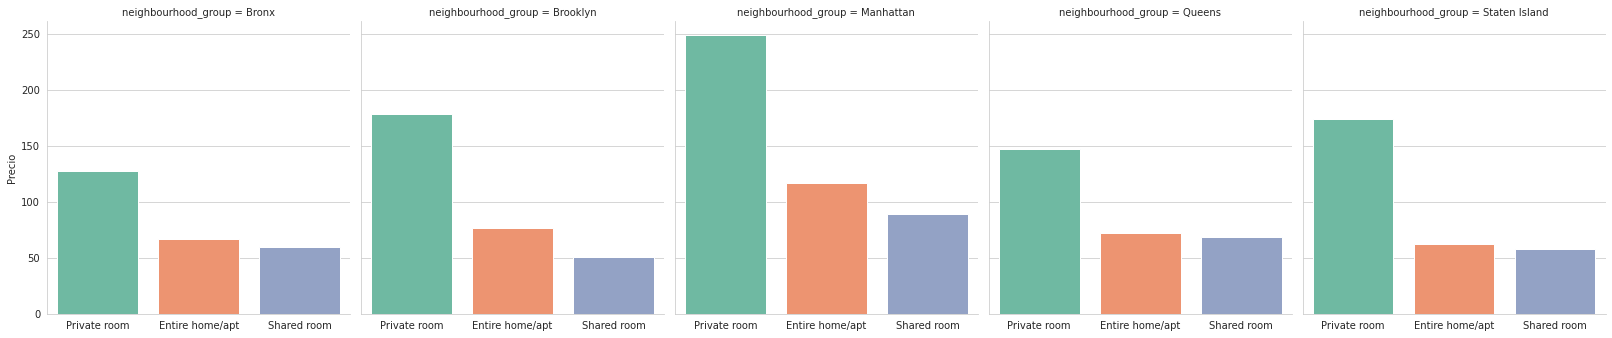

In [85]:
pr = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df, saturation=.8,
                kind="bar", ci=None,  aspect=.9)

(pr.set_axis_labels("", "Precio")
    .set_xticklabels(["Private room", "Entire home/apt", "Shared room"]))

plt.show()
#Precios según tipo de habitación y barrio